# Prologue
In this project we will try to perform Sentiment Analysis on different tweets from different datasets related to Coronavirus corresponding to different periods.
## Dataset 1: corona_tweets_01.csv (21.65 MB)
According to the description page from which we acquired this dataset, **corona_tweets_01.csv** contains tweets that corresponds to the period **March 20, 2020 01:37 AM - March 21, 2020 09:25 AM (1 Day)**.

## Dataset 2: corona_tweets_105.csv (34.73 MB zipped)
The **corona_tweets_105.csv** dataset contains tweets that corresponds to the period **July 01, 2020 10:11 AM - July 02, 2020 12:28 PM (1 Day)**.

## Dataset 3: Multiple files (215.00 MB zipped)
This dataset will be the combination of multiple tweet subsets of the following datasets:
* The **corona_tweets_102.csv** dataset corresponds to the period **June 28, 2020 10:10 AM - June 29, 2020 10:10 AM**.
* The **corona_tweets_103.csv** dataset corresponds to the period **June 29, 2020 10:10 AM - June 30, 2020 10:10 AM**.
* The **corona_tweets_104.csv** dataset corresponds to the period **June 30, 2020 10:10 AM - July 01, 2020 10:10 AM**.
* The **corona_tweets_105.csv** dataset corresponds to the period **July 01, 2020 10:11 AM - July 02, 2020 12:28 PM**.
* The **corona_tweets_106.csv** dataset corresponds to the period **July 02, 2020 12:29 PM - July 03, 2020 10:10 AM**.
* The **corona_tweets_107.csv** dataset corresponds to the period **July 03, 2020 10:10 AM - July 04, 2020 07:00 AM**.
* The **corona_tweets_108.csv** dataset corresponds to the period **July 04, 2020 07:01 AM - July 05, 2020 09:16 AM**.

This dataset will have a timespan that is almost **one week**. Which is interesting for visualization of information over time.

Since the two first datasets corresponds to different periods, this may allow us to understand how people reacted during each period and may also allow us to determine the subjects that dominated each of these periods.
Unlike the first two datasets, the third dataset is the combination of multiple subsets of datasets that corresponds to consecutive period of time that equals one week. Since this third dataset is caracterized by larger timespan, it will allow visualization of information over time.

# Coronavirus (COVID-19) Tweets Dataset
**Dataset reference**
* Title: Coronavirus (COVID-19) Tweets Dataset
* License: Creative Commons Attribution
* URL: https://ieee-dataport.org/open-access/coronavirus-covid-19-tweets-dataset

# Installing NLTK Data

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Required Imports

In [1]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity # This is a corpus example
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import pandas as pd
import json

# Download datasets
We created our own copies of the datasets to make usage easier, since *IEEE DataPort* requires an account to perform downloads.
The datasets contains only 2 columns, the tweet ID as first column and the sentiment score computed by *TextBlob* appended as the second column.

In [335]:
!mkdir -p datasets/
!wget -P datasets/ https://raw.githubusercontent.com/ayoubismaili/SentimentAnalysis/master/datasets/corona_tweets_01.csv
for i in range(102, 109):
    !wget -P datasets/ https://raw.githubusercontent.com/ayoubismaili/SentimentAnalysis/master/datasets/corona_tweets_{i}.zip
!unzip -o datasets/corona_tweets_10\*.zip -d datasets/

--2020-07-06 15:15:34--  https://raw.githubusercontent.com/ayoubismaili/SentimentAnalysis/master/datasets/corona_tweets_01.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22698837 (22M) [text/plain]
Saving to: ‘datasets/corona_tweets_01.csv’

corona_tweets_01.cs 100%[===================>]  21.65M  48.6MB/s    in 0.4s    

2020-07-06 15:15:35 (48.6 MB/s) - ‘datasets/corona_tweets_01.csv’ saved [22698837/22698837]

--2020-07-06 15:15:35--  https://raw.githubusercontent.com/ayoubismaili/SentimentAnalysis/master/datasets/corona_tweets_102.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP

# Pulling Tweets and Building filled datasets
Since the datasets contains only tweet IDs, we will need to pull actual tweets content from *Twitter*. In order to do this, we created our own class called **TweetCollector**. In **TweetCollector** we do not use the rate-limited API provided by *Twitter*, instead we use a little bit hacky method that allows a non rate-limited access to data.
We will fetch only first availabe 1000 tweets from each dataset.
Tweets can contain new lines, therefore csv is not a convenient way to store them. To preserve tweets structure we opted for json usage.

In [87]:
from tweetcollector import TweetCollector

tc = TweetCollector()
tweet_count = 1000

# Fetch tweets of the first dataset

# The header=None prevents Pandas from treating the first row as a column name
print ('Fetching 01st dataset tweets')
print ('This operation may take a long time...')
df = pd.read_csv('datasets/corona_tweets_01.csv', header=None)
subset = df.iloc[0:tweet_count, 0]
tweets = list(tc.get_tweet_list(subset))
f = open('datasets/corona_tweets_01.json', 'w')
f.write(json.dumps(tweets))
f.close()
print ('Fetched 01st dataset tweets\n')

# Fetch tweets of the second and third dataset (Literally the second dataset is a part of the third dataset)

for i in range(102, 109):
    print ('Fetching {}th dataset tweets'.format(i))
    print ('This operation may take a long time...')
    df = pd.read_csv('datasets/corona_tweets_{}.csv'.format(i), header=None)
    subset = df.iloc[0:tweet_count, 0]
    tweets = list(tc.get_tweet_list(subset))
    f = open('datasets/corona_tweets_{}.json'.format(i), 'w')
    f.write(json.dumps(tweets))
    f.close()
    print ('Fetched {}th dataset tweets\n'.format(i))


Fetching 01st dataset tweets
This operation may take a long time...
Fetched 01st dataset tweets

Fetching 102th dataset tweets
This operation may take a long time...
Fetched 102th dataset tweets

Fetching 103th dataset tweets
This operation may take a long time...
Fetched 103th dataset tweets

Fetching 104th dataset tweets
This operation may take a long time...
Fetched 104th dataset tweets

Fetching 105th dataset tweets
This operation may take a long time...
Fetched 105th dataset tweets

Fetching 106th dataset tweets
This operation may take a long time...
Fetched 106th dataset tweets

Fetching 107th dataset tweets
This operation may take a long time...
Fetched 107th dataset tweets

Fetching 108th dataset tweets
This operation may take a long time...
Fetched 108th dataset tweets



# Alternative: Downloading preprepared json datasets

In [337]:
for i in range(102, 109):
    !wget -P datasets/ https://raw.githubusercontent.com/ayoubismaili/SentimentAnalysis/master/datasets/corona_tweets_{i}.json

--2020-07-06 15:33:58--  https://raw.githubusercontent.com/ayoubismaili/SentimentAnalysis/master/datasets/corona_tweets_102.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161737 (158K) [text/plain]
Saving to: ‘datasets/corona_tweets_102.json.1’

corona_tweets_102.j 100%[===================>] 157.95K  --.-KB/s    in 0.02s   

2020-07-06 15:33:58 (7.93 MB/s) - ‘datasets/corona_tweets_102.json.1’ saved [161737/161737]

--2020-07-06 15:33:58--  https://raw.githubusercontent.com/ayoubismaili/SentimentAnalysis/master/datasets/corona_tweets_103.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected

# Sentiment Analysis
## Period 1: March 20, 2020 01:37 AM - March 21, 2020 09:25 AM (1 Day)

First, we will try to analyze data from the first dataset **corona_tweets_01.json**. The *NLTK* library offers the class *SentimentIntensityAnalyzer* that we will use to count different sentiments: Positive, Neutral and Negative.

### Sentiment Intensity Analysis

In [88]:
# Get the dataframe from json
tweets_df_01 = pd.read_json('datasets/corona_tweets_01.json')
# Get all tweets

# It is important to drop any 'None' value, as Twitter data is not stable, 
# accounts can become private or may even get deleted or suspended 
# which may result in tweets becoming inaccessible either temporarily or permanently.
tweets = tweets_df_01.dropna().iloc[:, 0]
sentences = []
# Tokenize every single tweet and append them to the sentences list
# A single tweet may contain multiple sentences, reason for which we tokenize them.
for tweet in tweets:
    lines = tokenize.sent_tokenize(tweet)
    sentences.extend(lines)

# We will cache sentences by sentiment for later use
positive_sentences = []
neutral_sentences = []
negative_sentences = []

sid = SentimentIntensityAnalyzer()
result = {'positive': 0, 'neutral': 0, 'negative': 0}
for sentence in sentences:
    ss = sid.polarity_scores(sentence)
    if ss['compound'] == 0.0:
        result['neutral'] += 1
        neutral_sentences.append(sentence)
    elif ss['compound'] > 0.0:
        result['positive'] += 1
        positive_sentences.append(sentence)
    else:
        result['negative'] += 1
        negative_sentences.append(sentence)

print (result)

{'positive': 386, 'neutral': 621, 'negative': 461}


### Sentiment Intensity Visualization

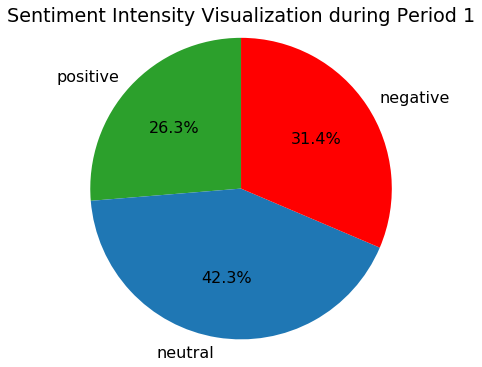

In [90]:
# Increase font size
plt.rcParams.update({'font.size': 16})
labels, sizes, colors = result.keys(), result.values(), ('C2', 'C0', 'red')

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Sentiment Intensity Visualization during Period 1')
fig.set_size_inches(6, 6)
plt.show()

### Frequency Distribution
In order to perform **Frequency Distribution** we will need to get rid of multiple things.
* We will get rid of stopwords, which include common words that is not useful to us.
* We will perform Lemmatization to reduce words to their base word.
* We will get rid of punctuation marks

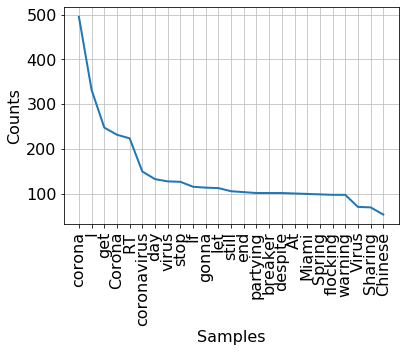

In [91]:
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

tknzr = TweetTokenizer()
fdist = FreqDist()
lem = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
for tweet in tweets:
    tokens = tknzr.tokenize(tweet)
    for token in tokens:
        if token.isalnum() and token not in stop_words:
            fdist[lem.lemmatize(token)] += 1

fdist.plot(25, cumulative=False)

### Install WordCloud package
The WordCloud package will allow us to visualize most frequent words in an attractive way.

In [53]:
!pip install wordcloud

     |████████████████████████████████| 364 kB 6.7 MB/s eta 0:00:01


### Most Common Words from Nagative Tweets

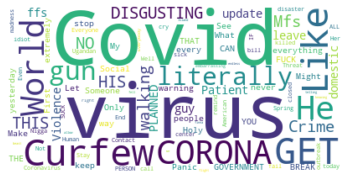

In [85]:
from wordcloud import WordCloud

tknzr = TweetTokenizer()
neg_fdist = FreqDist()
lem = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
# Let's blacklist some unwanted words
stop_words.update(['RT', 'https', 'fuck', 'dick'])

for sentence in negative_sentences:
    tokens = tknzr.tokenize(sentence)
    for token in tokens:
        if token.isalnum() and token not in stop_words:
            neg_fdist[lem.lemmatize(token)] += 1

wc = WordCloud(max_words=100, background_color='white').generate(' '.join(set(neg_fdist)))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Period 2: July 01, 2020 10:11 AM - July 02, 2020 12:28 PM (1 Day)

Now, let's analyze data from the second dataset **corona_tweets_105.json**.

### Sentiment Intensity Analysis

In [92]:
# Get the dataframe from json
tweets_df_105 = pd.read_json('datasets/corona_tweets_105.json')
# Get all tweets

# It is important to drop any 'None' value, as Twitter data is not stable, 
# accounts can become private or may even get deleted or suspended 
# which may result in tweets becoming inaccessible either temporarily or permanently.
tweets = tweets_df_105.dropna().iloc[:, 0]
sentences = []
# Tokenize every single tweet and append them to the sentences list
# A single tweet may contain multiple sentences, reason for which we tokenize them.
for tweet in tweets:
    lines = tokenize.sent_tokenize(tweet)
    sentences.extend(lines)

# We will cache sentences by sentiment for later use
positive_sentences = []
neutral_sentences = []
negative_sentences = []

sid = SentimentIntensityAnalyzer()
result = {'positive': 0, 'neutral': 0, 'negative': 0}
for sentence in sentences:
    ss = sid.polarity_scores(sentence)
    if ss['compound'] == 0.0:
        result['neutral'] += 1
        neutral_sentences.append(sentence)
    elif ss['compound'] > 0.0:
        result['positive'] += 1
        positive_sentences.append(sentence)
    else:
        result['negative'] += 1
        negative_sentences.append(sentence)

print (result)

{'positive': 570, 'neutral': 998, 'negative': 539}


### Sentiment Intensity Visualization

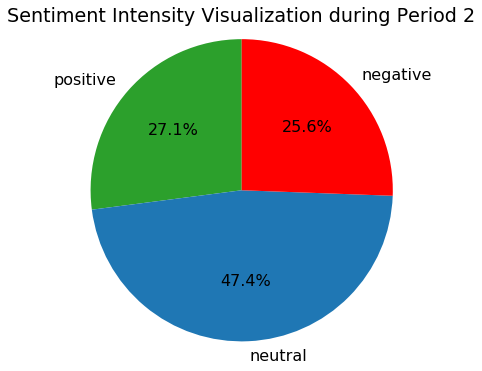

In [93]:
# Increase font size
plt.rcParams.update({'font.size': 16})
labels, sizes, colors = result.keys(), result.values(), ('C2', 'C0', 'red')

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Sentiment Intensity Visualization during Period 2')
fig.set_size_inches(6, 6)
plt.show()

### Named Entity Recognition: Let's extract most frequent names

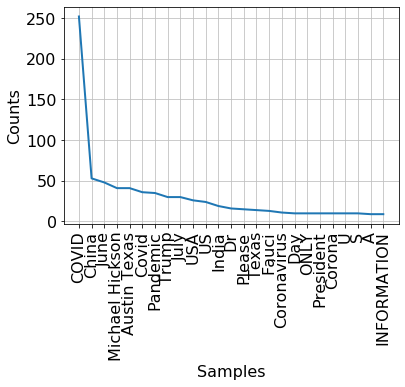

In [169]:
tknzr = TweetTokenizer()
def preprocess(tweet):
    tokens = tknzr.tokenize(tweet)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

fdist = FreqDist()
stop_words = ['RT']
for sentence in sentences:
    # POS-Tagging
    tagged_sentence = preprocess(sentence)
    # Chunking
    grammar = 'CHUNK: {<NNP>+}'
    cp = nltk.RegexpParser(grammar)
    sent_tree = cp.parse(tagged_sentence)
    for subtree in sent_tree.subtrees():
        if subtree.label() == 'CHUNK':
            leaves = subtree.leaves()
            name_list = []
            for leaf in leaves:
                if leaf[0].isalnum():
                    name_list.append (leaf[0])
            if len(name_list) > 0:
                name_cat = ' '.join(name_list)
                if name_cat not in stop_words:
                    fdist[name_cat] += 1

fdist.plot(25, cumulative=False)

From the plot, we can see that most of the tweets talk about the following subjects: **COVID, China, Michael Hickson,  Austin, Texas, Trump, USA, India and  Fauci**.

It is also worth to look at the structure of a POS-Tagged sentence example.

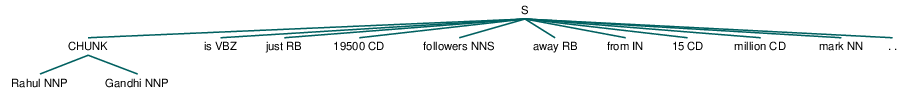

In [143]:
sentence = sentences[3]
# POS-Tagging
tagged_sentence = preprocess(sentence)
# Chunking
grammar = 'CHUNK: {<NNP>+}'
cp = nltk.RegexpParser(grammar)
sent_tree_example = cp.parse(tagged_sentence)
sent_tree_example

### Most Common Words from Positive Tweets

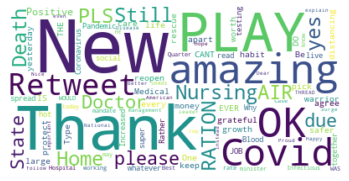

In [146]:
from wordcloud import WordCloud

tknzr = TweetTokenizer()
pos_fdist = FreqDist()
lem = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
# Let's blacklist some unwanted words
stop_words.update(['RT'])

for sentence in positive_sentences:
    tokens = tknzr.tokenize(sentence)
    for token in tokens:
        if token.isalnum() and token not in stop_words:
            pos_fdist[lem.lemmatize(token)] += 1

wc = WordCloud(max_words=100, background_color='white').generate(' '.join(set(pos_fdist)))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Period 3: June 28, 2020 10:10 AM - July 05, 2020 09:16 AM (1 Week)

In this part, we will try to combine multiple json datasets into one and perform analysis on them. For the sake of simplicity, we will consider that each json dataset corresponds to only one day and there is no overlap.

### Building the Dataset

In [332]:
import datetime
# Get the dataframes from json
tweets_df = pd.read_json('datasets/corona_tweets_{}.json'.format(102))
for i in range(103, 109):
    tweets_df = tweets_df.append(pd.read_json('datasets/corona_tweets_{}.json'.format(i)))

tweet_date = datetime.datetime(2020, 6, 28)
date_col = []
for i in range(7):
    date_col.extend([tweet_date] * 1000)
    tweet_date += datetime.timedelta(days=1)
tweets_df[1] = date_col

# Verify correctness
tweets_df.iloc[996:1004, :]

,0,1
996,🤧😭 this hurted,2020-06-28
997,This is the first year I’m not going to Fiji b...,2020-06-28
998,Follow #COVID19 Guidelines and stop the spread...,2020-06-28
999,None,2020-06-28
0,"HEARTBREAKING: “Can’t breathe, they removed th...",2020-06-29
1,"RT @CWBChicago: Sergeant: ""Be advised. Halsted...",2020-06-29
2,"As we come to terms with the pandemic, we must...",2020-06-29
3,A million workers wait for Covid-19 relief htt...,2020-06-29


Unlike the first two datasets, when we treated each sentence of a tweet equally, herein we will treat tweets equally and not sentences. Meaning that we will sum *compound* of each tweet and base decision upon this new *compound*.

### Sentiment Intensity Calculation

In [333]:
def get_sentiment(row):
    tweet = row.iloc[0] or "" # Get rid of None
    sentences = tokenize.sent_tokenize(tweet)
    total_compound = 0.0
    for sentence in sentences:
        ss = sid.polarity_scores(sentence)
        total_compound += ss['compound']
    if total_compound == 0.0:
        return 'Neutral'
    elif total_compound > 0.0:
        return 'Positive'
    else:
        return 'Negative'

sentiment_col = tweets_df.apply(get_sentiment, axis=1)
tweets_df[2] = sentiment_col
tweets_df.columns = ['Tweet', 'Date', 'Sentiment']

# Verify correctness
tweets_df.iloc[996:1004, :]

,Tweet,Date,Sentiment
996,🤧😭 this hurted,2020-06-28,Neutral
997,This is the first year I’m not going to Fiji b...,2020-06-28,Negative
998,Follow #COVID19 Guidelines and stop the spread...,2020-06-28,Negative
999,None,2020-06-28,Neutral
0,"HEARTBREAKING: “Can’t breathe, they removed th...",2020-06-29,Negative
1,"RT @CWBChicago: Sergeant: ""Be advised. Halsted...",2020-06-29,Neutral
2,"As we come to terms with the pandemic, we must...",2020-06-29,Positive
3,A million workers wait for Covid-19 relief htt...,2020-06-29,Positive


### Sentiment Over Time

In order to plot sentiment over time, we will need to group data in the dataframe by sentiment and date.

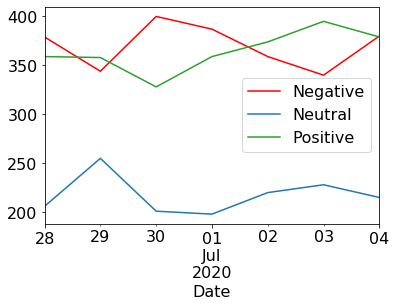

In [334]:
# Group data by Sentiment and Date

sot_df = tweets_df.groupby(['Sentiment', 'Date']).count()
ax = None
color_mapping = {'Negative': 'red', 'Neutral': 'C0', 'Positive': 'C2'}

for i in range(3):
    sent_df = sot_df.iloc[0+i*7: 7+i*7, :]
    sent_df.reset_index(inplace=True)
    sent = sent_df['Sentiment'].iloc[0]
    ax = sent_df.plot(ax=ax, kind='line', x='Date', y='Tweet', label=sent, color=color_mapping[sent])

# Epilog

We demonstrated in this notebook a bare usage of the **NLTK** library in which we performed NLP on tweets.
